## Simple Linear Regression
### Salary prediction
• predict salary value based on experience of an employee

#### import required packages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### pre-requisites

In [23]:
import warnings
warnings.filterwarnings(action="ignore")

#### load the dataset

In [25]:
df=pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


#### Exploratory Data Analysis (EDA)
- get the basic information of the df

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  33 non-null     float64
 1   Salary           33 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 660.0 bytes


In [40]:
# get the statistical information about the data
df.describe()

,YearsExperience,Salary
count,33.000000,33.000000
mean,5.921212,82760.303030
std,3.342413,34014.620992
min,1.100000,37731.000000
25%,3.200000,56957.000000
50%,5.100000,67938.000000
75%,8.700000,109431.000000
max,13.000000,156000.000000


In [41]:
# get a quick view of data
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [42]:
# get a quick view of last few records
df.tail()

,YearsExperience,Salary
28,10.3,122391
29,10.5,121872
30,11.0,140000
31,12.0,155000
32,13.0,156000


In [43]:
# check if df has any NA value
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Split the data

In [44]:
# create x
# set of independent variables
#- is is mandatory to get the x as 2D array or data frame
#- axis: 0-> row, 1-> column
#- df.drop() will remove the column and return a new dataframe object
#- it does not update the existing data frame
x = df.drop('Salary', axis=1)
#create y
#- dependent variable
#- it is mandatory to get the y as 1D array or series
y = df['Salary']

In [45]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [46]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [48]:
from sklearn.model_selection import train_test_split
# split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

#### model building

In [49]:
from sklearn.linear_model import LinearRegression
# create a model
model = LinearRegression()
# train the model using the x and y
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### model prediction

In [50]:
prediction = model.predict([[16]])
print(f"Salary of an employee with 16yrs of experience = {prediction[0]:.2f}")

Salary of an employee with 16yrs of experience = 183650.98


In [51]:
# predict salary of persons having 15, 16, 17 and 100 years of exp
predictions = model.predict([[15], [16], [17], [100]])

In [52]:
predictions

array([ 173640.78093875,  183650.98044135,  193661.17994395,
       1024507.73865973])

In [53]:
# predict the profit values for test set
y_pred = model.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error
# mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae

2719.799020311847

In [55]:
from sklearn.metrics import mean_squared_error
# mean squared error
mse = mean_squared_error(y_test, y_pred)
mse

9550269.372382898

In [57]:
from sklearn.metrics import root_mean_squared_error
# root mean squared error
rmse = root_mean_squared_error(y_test, y_pred)
rmse

3090.3510111932105

In [58]:
rmse = np.sqrt(mse)
rmse

np.float64(3090.3510111932105)

In [60]:
rmse = mse ** 0.5
rmse

3090.3510111932105

In [61]:
from sklearn.metrics import r2_score
# get r2 score
r2 = r2_score(y_test, y_pred)
r2

0.9932788883635083

## EDA - vizualization

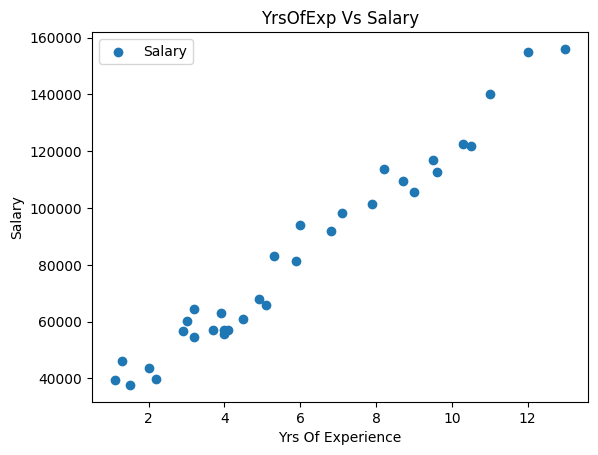

In [62]:
plt.scatter(df['YearsExperience'],df['Salary'],label ='Salary')
plt.xlabel("Yrs Of Experience")
plt.ylabel("Salary")
plt.title("YrsOfExp Vs Salary")
plt.legend()

In [63]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.983642
Salary,0.983642,1.000000


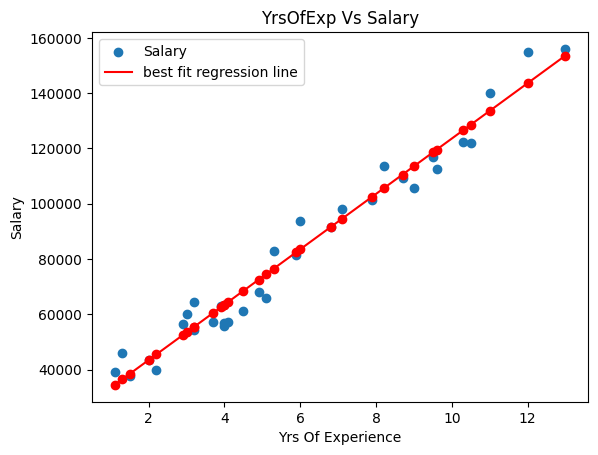

In [64]:
plt.scatter(df['YearsExperience'],df['Salary'],label ='Salary')
plt.plot(df['YearsExperience'],model.predict(x),color="red", label ="best fit regression line")
plt.scatter(df['YearsExperience'],model.predict(x),color ="red")
plt.xlabel("Yrs Of Experience")
plt.ylabel("Salary")
plt.title("YrsOfExp Vs Salary")
plt.legend()

In [37]:
model.score(x,y)

0.9675521257940194